In [1]:
import numpy as np
import numpy.linalg as la
from tt import *
import maxvolpy as mv

In [94]:
# Skeleton function
# INPUT: 
# 1. unfolding matrix M, M.shape=(Nl, Nr) - toll matrix
# 2. r - rank of submatrix to be of quasi-maxvol
# 3. delta - accuracy of approximation

def sk(M, r, delta):
    # initialization
    # M_p - previous
    # M_n - next
    assert(M.shape[1] > r)
    J = np.arange(r) # first r columns of unfolding matrix
    Mp = np.zeros((M.shape[0], M.shape[1]))
    while(True):
        
        C = M[:, J]
        Q, T = la.qr(C)
        # assert(Q.shape=...)
        I = maxvol.maxvol(Q)
        print(I, type(I))
        R = M[I, :].T
        Q, T = la.qr(R)
        J = maxvol.maxvol(Q)
        Q_hat = Q[J, :]
        aux1 = la.inv(Q_hat)
        
        aux2 = la.solve(Q_hat.T, Q.T)
#         Mn = M[:, J] @ (Q @ la.inv(Q_hat)).T
        Mn = M[:, J] @ aux2
        print("rows", I)
        print("columns", J)
        if(la.norm(Mn - Mp, ord='fro') > delta * la.norm(Mn, ord='f')):
            break;

    M_hat_inv = M[I, :]
    M_hat_inv = M_hat_inv[:, J]
    M_hat_inv = la.inv(M_hat_inv)
    
    return C, M_hat_inv, R

In [95]:
A = np.random.rand(1000, 10)

r = 5
delta = 1e-5

C, M_hat_inv, R = sk(A, r, delta)

[ 66 910 969 367 529] <class 'numpy.ndarray'>
rows [ 66 910 969 367 529]
columns [3 2 1 0 4]


### Latin Hypercube Sampling Multi-Dimensional Uniform

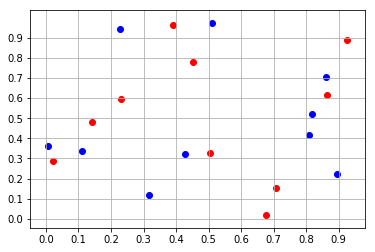

In [83]:
import lhsmdu
import matplotlib.pyplot as plt
import numpy


l = np.asarray(lhsmdu.sample(2, 10)) # Latin Hypercube Sampling of two variables, and 10 samples each.
k = np.asarray(lhsmdu.createRandomStandardUniformMatrix(2, 10)) # Monte Carlo Sampling


fig = plt.figure()
ax = fig.gca()
ax.set_xticks(numpy.arange(0,1,0.1))
ax.set_yticks(numpy.arange(0,1,0.1))

plt.scatter(k[0, :], k[1, :], color="b", label="LHS-MDU")
plt.scatter(l[0, :], l[1, :], color="r", label="MC")
plt.grid()
plt.show()

In [12]:
Z = np.array([[2, 3, 4, 5, 6, 7, 8], 
            [2, 3, 4, 5, 6, 7, 8],
            [2, 3, 4, 5, 6, 7, 8],
            [2, 3, 4, 5, 6, 7, 8],
            [2, 3, 4, 34, 6, 28, 44],
            [2, 3, 4, 5, 6, 7, 8]])
print(Z)
H = np.array([0, 2, 4])
Z = Z[:, H]
print(Z)

[[ 2  3  4  5  6  7  8]
 [ 2  3  4  5  6  7  8]
 [ 2  3  4  5  6  7  8]
 [ 2  3  4  5  6  7  8]
 [ 2  3  4 34  6 28 44]
 [ 2  3  4  5  6  7  8]]
[[2 4 6]
 [2 4 6]
 [2 4 6]
 [2 4 6]
 [2 4 6]
 [2 4 6]]
